<a href="https://www.kaggle.com/code/shaheerhussain/food-demand-analysis-eda?scriptVersionId=145884726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-demand/meal_info.csv
/kaggle/input/food-demand/agency-csv-5.csv
/kaggle/input/food-demand/fulfilment_center_info.csv
/kaggle/input/food-demand/food-security-food-demand-for-crop-1.json
/kaggle/input/food-demand/train.csv
/kaggle/input/food-demand/agency-location-csv-23.csv


In [2]:
df = pd.read_csv("/kaggle/input/food-demand/train.csv")
mi=pd.read_csv("/kaggle/input/food-demand/meal_info.csv")
fc=pd.read_csv("/kaggle/input/food-demand/fulfilment_center_info.csv")

In [3]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
for i in df.columns.tolist():
    x=df[i].unique()
    x.sort()
    print("{} contain {} unique value which are \n {}".format(i,len(x),x))
    

id contain 456548 unique value which are 
 [1000000 1000001 1000002 ... 1499997 1499998 1499999]
week contain 145 unique value which are 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
center_id contain 77 unique value which are 
 [ 10  11  13  14  17  20  23  24  26  27  29  30  32  34  36  39  41  42
  43  50  51  52  53  55  57  58  59  61  64  65  66  67  68  72  73  74
  75  76  77  80  81  83  86  88  89  91  92  93  94  97  99 101 102 104
 106 1

In [7]:
df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

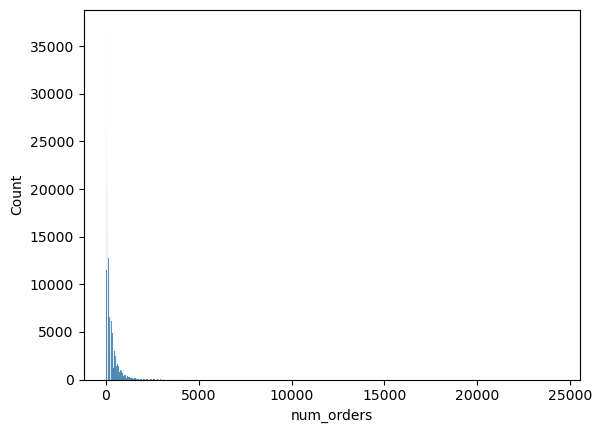

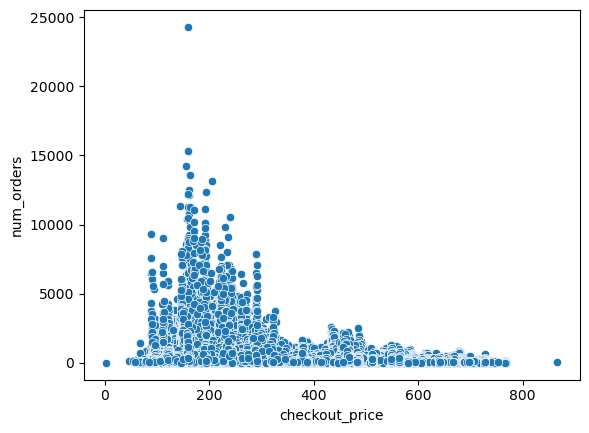

In [8]:
# Example code to create a histogram and scatter plot
sns.histplot(x='num_orders', data=df)
plt.show()

sns.scatterplot(x='checkout_price', y='num_orders', data=df)
plt.show()

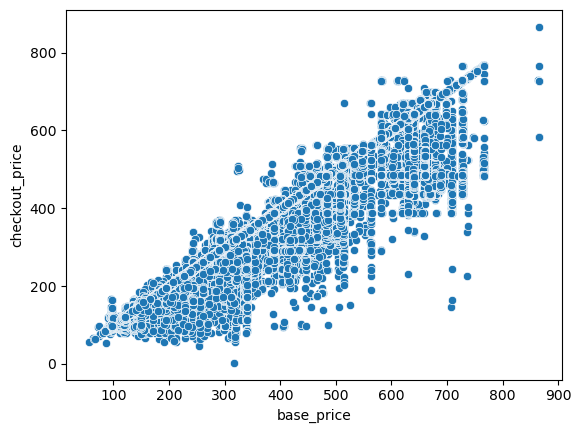

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='base_price', y='checkout_price', data=df)
plt.show()


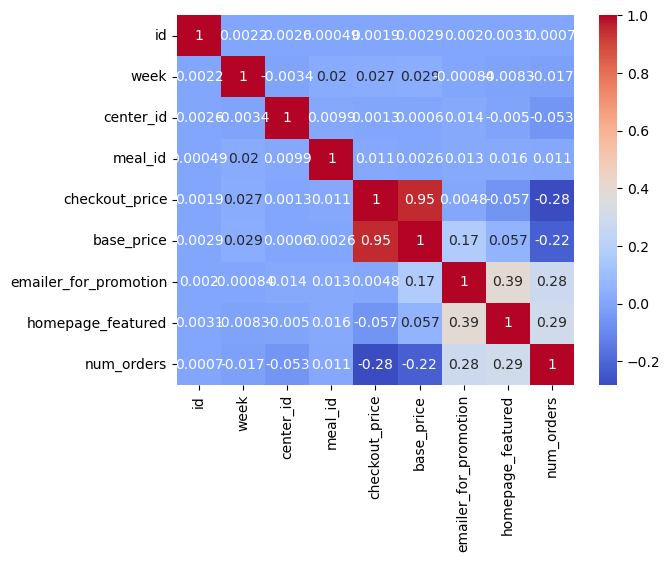

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


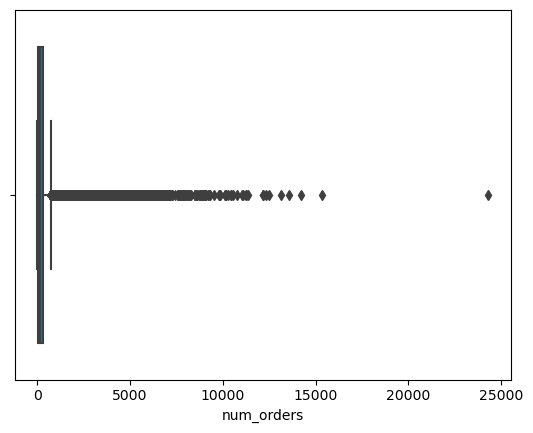

In [11]:
sns.boxplot(x=df['num_orders'])
plt.show()


In [12]:
# conduct a t-test
from scipy.stats import ttest_ind

group1 = df[df['emailer_for_promotion'] == 1]['num_orders']
group2 = df[df['emailer_for_promotion'] == 0]['num_orders']
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(t_stat, p_value)



86.85409829914366 0.0


# t-test
In above code 
The t-test calculates the difference between the means of two groups (group1 and group2 in this example) and compares it to the variability within the groups.

In this code, we are comparing the mean number of orders for meals that were promoted via emailer (group1) and meals that were not promoted via emailer (group2).

The t-statistic (86.85) indicates the difference between the means of the two groups in terms of the number of standard errors. The higher the t-value, the more likely it is that the difference between the means is not due to chance.

The p-value (0.0) indicates the probability of obtaining a t-statistic as extreme as the one observed, assuming that the null hypothesis is true. In this case, the null hypothesis is that the means of the two groups are equal. A p-value of 0.0 indicates that the probability of observing such a difference in means due to chance is virtually zero.

Therefore, we can reject the null hypothesis and conclude that there is a significant difference between the mean number of orders for meals that were promoted via emailer and meals that were not promoted via emailer. In this case, the group of meals promoted via emailer has a higher mean number of orders compared to the group of meals not promoted via emailer.

In [13]:
emailer_prices = df[df['emailer_for_promotion']==1]['checkout_price']
no_emailer_prices = df[df['emailer_for_promotion']==0]['checkout_price']

ttest_ind(emailer_prices, no_emailer_prices)


Ttest_indResult(statistic=3.2552590495812566, pvalue=0.001132972270714228)

# t-test

In above code, we are conducting an independent samples t-test to compare the average checkout prices of meals that were promoted via emailer to the average checkout prices of meals that were not promoted via emailer.

First, we create two groups of data - one for the checkout prices of meals that were promoted via emailer (emailer_prices) and another for the checkout prices of meals that were not promoted via emailer (no_emailer_prices).

Then we use the ttest_ind() function from the scipy.stats library to conduct the t-test. The ttest_ind() function takes the two groups of data as inputs and returns the t-statistic and p-value.

The t-statistic value (3.255) tells us how many standard errors the means of the two groups are apart from each other. The larger the absolute value of the t-statistic, the more likely it is that the difference between the means is not due to chance. In this case, the t-statistic value indicates that there is a significant difference between the means of the two groups.

The p-value (0.001) indicates the probability of obtaining a t-statistic as extreme as the one observed, assuming that the null hypothesis is true. In this case, the null hypothesis is that there is no significant difference between the means of the two groups. A p-value of 0.001 indicates that the probability of observing such a difference in means due to chance is very low.

Therefore, based on the results of the t-test, we can reject the null hypothesis and conclude that there is a statistically significant difference between the average checkout prices of meals that were promoted via emailer and the average checkout prices of meals that were not promoted via emailer.

.

    center_id  num_orders
0          10  481.969779
1          11  411.307161
2          13  609.784984
3          14  197.832809
4          17  192.376283
..        ...         ...
72        161  145.581828
73        162  155.807375
74        174  405.251342
75        177  192.820431
76        186  153.216715

[77 rows x 2 columns]


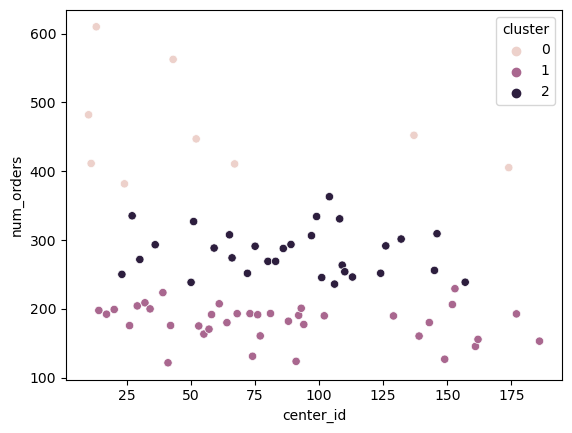

In [14]:
from sklearn.cluster import KMeans

center_orders = df.groupby('center_id')['num_orders'].mean().reset_index()
print(center_orders)
X = center_orders[['num_orders']]
kmeans = KMeans(n_clusters=3).fit(X)
center_orders['cluster'] = kmeans.labels_

sns.scatterplot(x='center_id', y='num_orders', hue='cluster', data=center_orders)
plt.show()


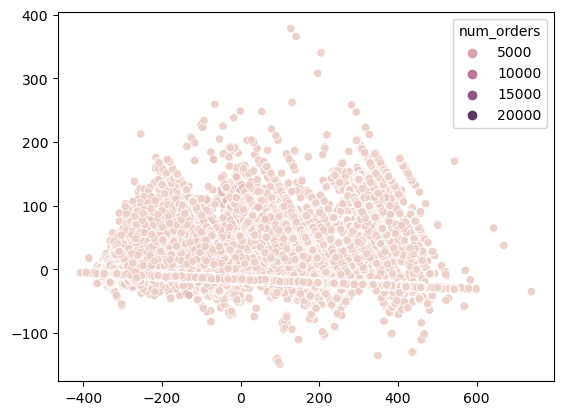

In [15]:
from sklearn.decomposition import PCA

X = df[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['num_orders'])
plt.show()


In [16]:
df['discount_percentage'] = (df['base_price'] - df['checkout_price']) / df['base_price'] * 100


1. checkout_price: 0.19476809148416727
2. meal_id: 0.19294477244939306
3. center_id: 0.16556024853495208
4. base_price: 0.1236403313729737
5. discount_percentage: 0.10596722895767825
6. homepage_featured: 0.08689309115776239
7. week: 0.07927477113255102
8. emailer_for_promotion: 0.05095146491052239


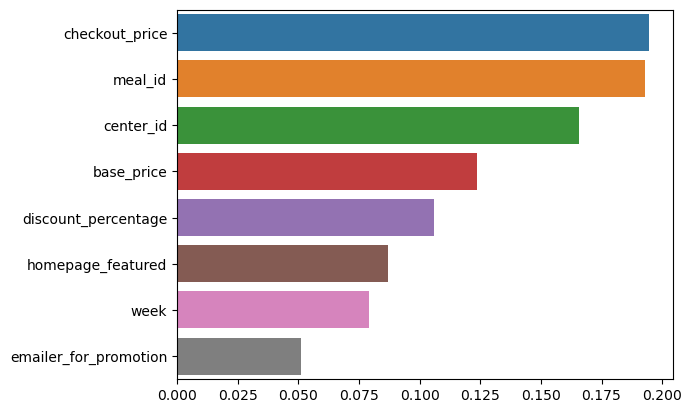

In [17]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['id', 'num_orders'], axis=1)
y = df['num_orders']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")

sns.barplot(x=importances[indices], y=X.columns[indices])
plt.show()


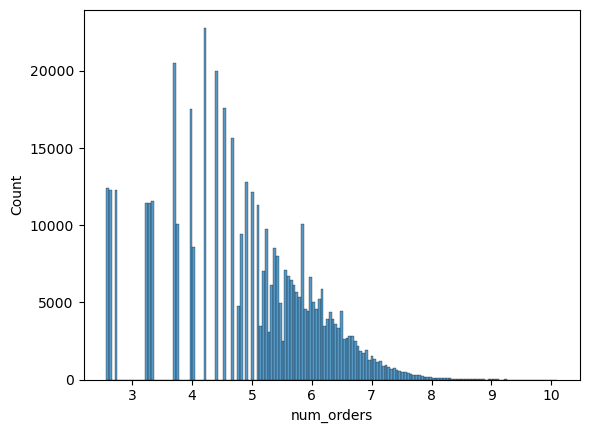

In [18]:
log_orders = np.log(df['num_orders'])
sns.histplot(log_orders)
plt.show()

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(df.drop(['id'], axis=1))

# sns.scatterplot(x=scaled_df[:,0], y=scaled_df[:,1], hue=scaled_df[:,8])
# plt.show()


In [19]:
df['week']

0           1
1           1
2           1
3           1
4           1
         ... 
456543    145
456544    145
456545    145
456546    145
456547    145
Name: week, Length: 456548, dtype: int64

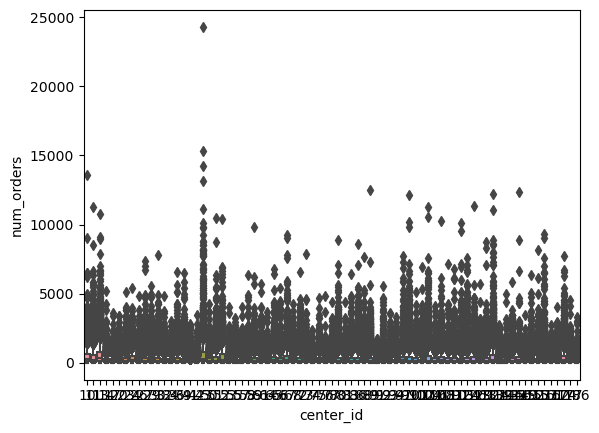

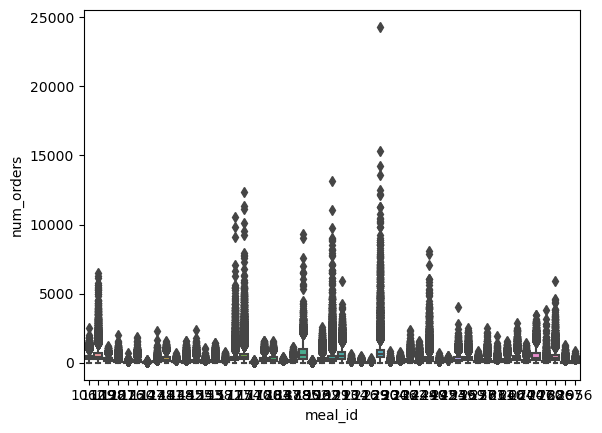

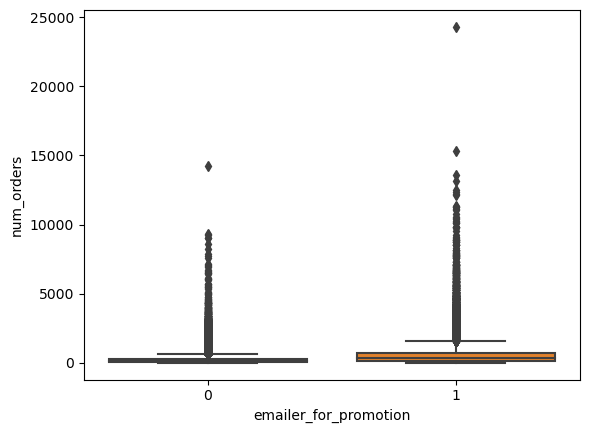

In [20]:
sns.boxplot(x='center_id', y='num_orders', data=df)
plt.show()

sns.boxplot(x='meal_id', y='num_orders', data=df)
plt.show()

sns.boxplot(x='emailer_for_promotion', y='num_orders', data=df)
plt.show()

In [21]:
mi

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


<AxesSubplot:xlabel='cuisine', ylabel='category'>

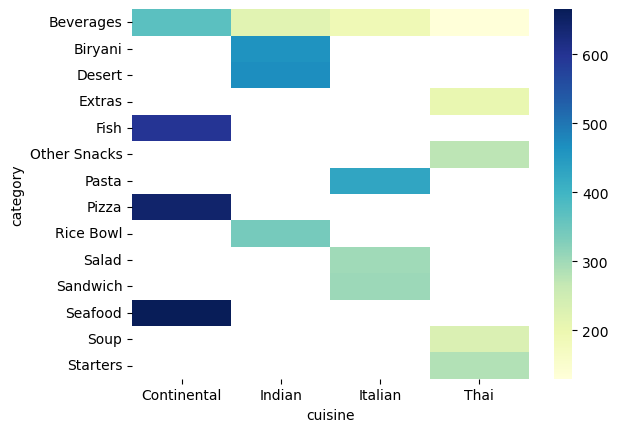

In [22]:
# Load the two datasets
orders_df = df
menu_df = mi

# Merge the two datasets based on meal_id
merged_df = pd.merge(orders_df, menu_df, on='meal_id')

# Group the data by category and cuisine, and calculate the average price for each group
price_summary = merged_df.groupby(['category', 'cuisine']).agg({'base_price': 'mean'}).reset_index()

# Plot the results using a heatmap
sns.heatmap(price_summary.pivot('category', 'cuisine', 'base_price'), cmap='YlGnBu')


Calculate the correlation between the num_orders column and other columns using Pearson's correlation coefficient. This can help us identify any strong positive or negative correlations between variables, which can be useful for feature selection or model building.

In [23]:
from scipy.stats import pearsonr

# Calculate the correlation between num_orders and checkout_price
corr, pval = pearsonr(df['num_orders'], df['checkout_price'])
print('Correlation:', corr, 'p-value:', pval)

# Calculate the correlation between num_orders and base_price
corr, pval = pearsonr(df['num_orders'], df['base_price'])
print('Correlation:', corr, 'p-value:', pval)


Correlation: -0.2821083516807987 p-value: 0.0
Correlation: -0.2223061381406307 p-value: 0.0


Visualize the distribution of category and cuisine columns using bar plots. This can help us understand the frequency distribution of each category and cuisine and identify any popular or less popular ones.

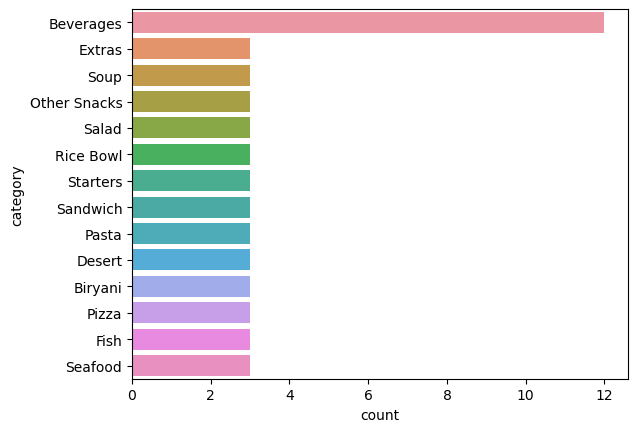

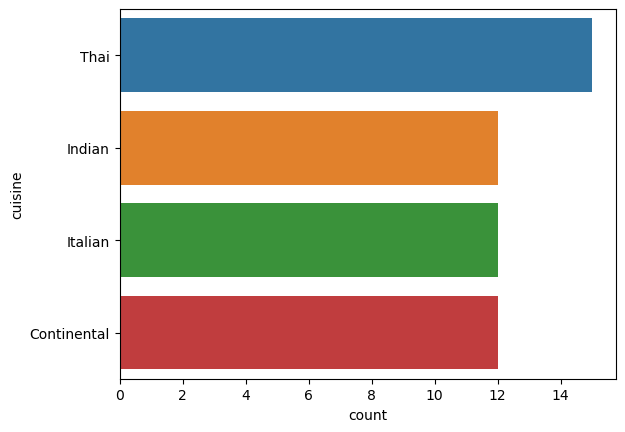

In [24]:
# Create a bar plot of category counts
sns.countplot(y='category', data=mi)
plt.show()

# Create a bar plot of cuisine counts
sns.countplot(y='cuisine', data=mi)
plt.show()


Calculate the number of unique categories and cuisines in the dataset. This can help us understand the diversity of the dataset and also help with feature selection and model building.

In [25]:
# Count the number of unique categories
num_categories = mi['category'].nunique()
print('Number of categories:', num_categories)

# Count the number of unique cuisines
num_cuisines = mi['cuisine'].nunique()
print('Number of cuisines:', num_cuisines)


Number of categories: 14
Number of cuisines: 4


Calculate the average number of orders per category and cuisine. This can help us identify which categories and cuisines are more popular among customers and can help with menu planning and marketing strategies.

In [26]:
# Calculate the average number of orders per category
category_orders = merged_df.groupby('category')['num_orders'].mean()
print(category_orders)

# Calculate the average number of orders per cuisine
cuisine_orders = merged_df.groupby('cuisine')['num_orders'].mean()
print(cuisine_orders)


category
Beverages       316.526116
Biryani          30.651402
Desert           66.250905
Extras          293.834169
Fish             85.595268
Other Snacks    162.234691
Pasta            59.137142
Pizza           222.817309
Rice Bowl       624.822288
Salad           383.218460
Sandwich        529.776276
Seafood         100.895898
Soup             82.023353
Starters        155.276110
Name: num_orders, dtype: float64
cuisine
Continental    164.545348
Indian         229.039037
Italian        359.347830
Thai           276.423411
Name: num_orders, dtype: float64


Analyze the relationship between category, cuisine, and emailer_for_promotion with num_orders. This can help us understand if email promotions for certain categories or cuisines are more effective in driving sales.

# Email for Promotion
from the below analysis we can clearly see that Email has a direct imact in number of orders as we can see its one of the best way to engage with the Customer and increase the sales

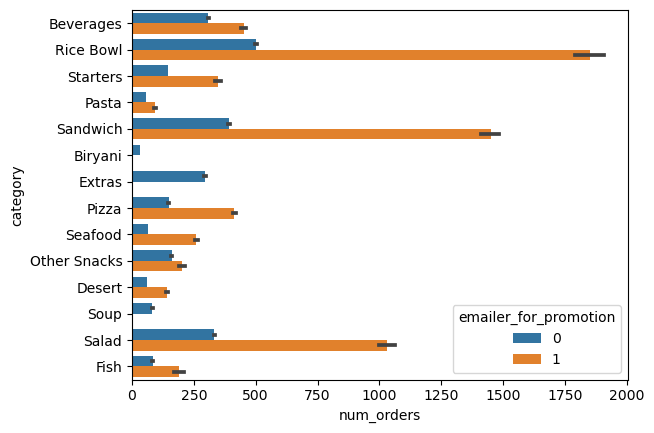

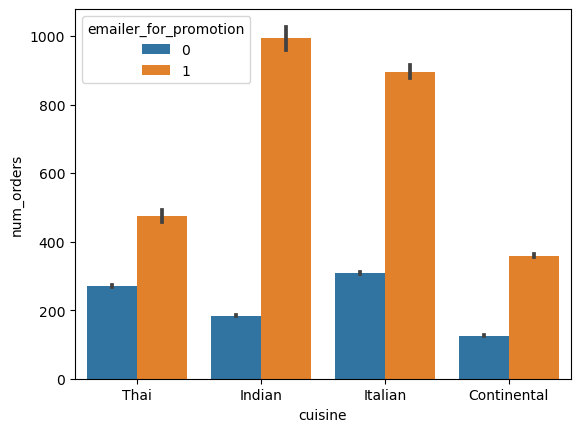

In [27]:
# Create a bar plot of average num_orders by category and emailer promotion
sns.barplot(y='category', x='num_orders', hue='emailer_for_promotion', data=merged_df)
plt.show()

# Create a bar plot of average num_orders by cuisine and emailer promotion
sns.barplot(x='cuisine', y='num_orders', hue='emailer_for_promotion', data=merged_df)
plt.show()


Analyze the relationship between category, cuisine, and homepage_featured with num_orders. This can help us understand if featuring certain categories or cuisines on the homepage is more effective in driving sales.

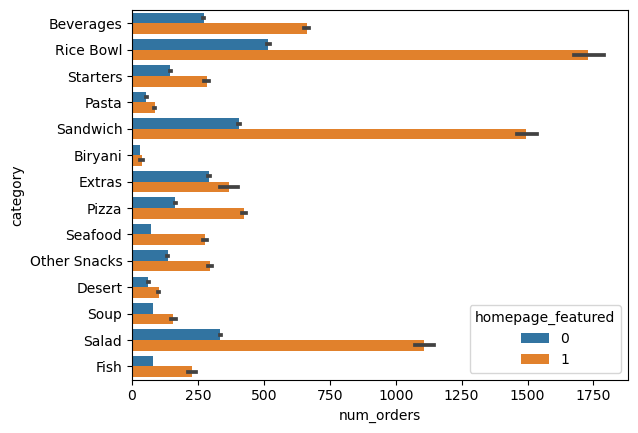

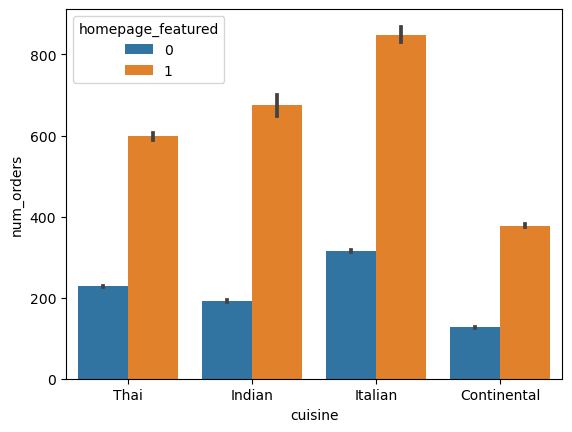

In [28]:
# Create a bar plot of average num_orders by category and homepage_featured
sns.barplot(y='category', x='num_orders', hue='homepage_featured', data=merged_df)
plt.show()

# Create a bar plot of average num_orders by cuisine and homepage_featured
sns.barplot(x='cuisine', y='num_orders', hue='homepage_featured', data=merged_df)
plt.show()


In [29]:
fc

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [30]:

# load the three datasets
orders_df =df
meals_df = mi
centers_df = fc

# merge the orders dataset with the meals dataset
merged_df = pd.merge(orders_df, meals_df, on='meal_id', how='left')

# merge the resulting dataset with the centers dataset
final_df = pd.merge(merged_df, centers_df, on='center_id', how='left')

we group final_df by region_code using groupby. Then, we calculate the total revenue and number of orders for each region by aggregating the checkout_price and num_orders columns respectively using sum. The resulting data is stored in region_revenue and region_orders.


In [31]:
region_grouped = final_df.groupby('region_code')
region_revenue = region_grouped['checkout_price'].sum()
region_orders = region_grouped['num_orders'].sum()


for the total_revenue,  num_orders and   avg order price
in every region

In [32]:
# Calculate total revenue and average order price by region
final_df['total_revenue'] = final_df['checkout_price'] * final_df['num_orders']
df_region_revenue = final_df.groupby('region_code')['total_revenue'].sum().reset_index()
df_region_orders = final_df.groupby('region_code')['num_orders'].sum().reset_index()
df_region = pd.merge(df_region_revenue, df_region_orders, on='region_code')
df_region['avg_order_price'] = final_df['total_revenue'] / final_df['num_orders']
print(df_region)

   region_code  total_revenue  num_orders  avg_order_price
0           23   4.279424e+08     1609906           136.83
1           34   6.664299e+09    24051733           136.83
2           35   1.966402e+08      691044           134.86
3           56   1.581182e+10    60520191           339.50
4           71   5.483339e+08     2103282           243.50
5           77   5.573710e+09    20529653           251.23
6           85   2.367390e+09     8685386           183.36
7           93   3.326346e+08     1366290           182.36


<AxesSubplot:title={'center':'Average Number of Orders by Center Type'}, xlabel='center_type'>

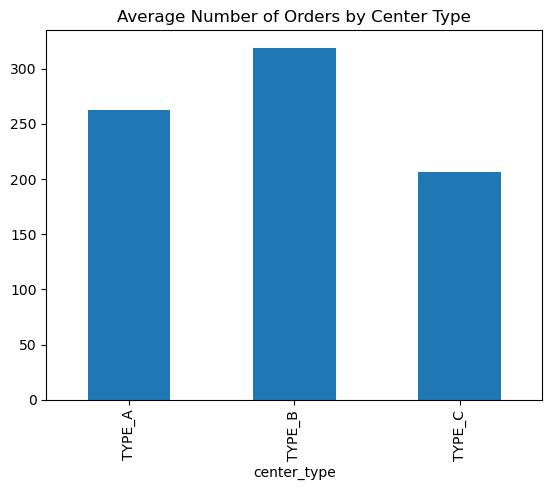

In [33]:
# Grouping the data by center type and calculating the average number of orders
orders_by_center_type = final_df.groupby('center_type')['num_orders'].mean()

# Plotting the results
orders_by_center_type.plot(kind='bar', title='Average Number of Orders by Center Type')

<AxesSubplot:title={'center':'Average Checkout Price by Cuisine'}, xlabel='cuisine'>

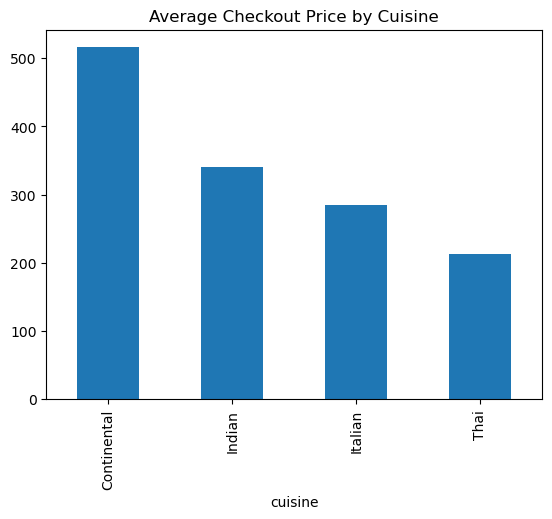

In [34]:

# Grouping the data by cuisine and calculating the average checkout price
checkout_by_cuisine = final_df.groupby('cuisine')['checkout_price'].mean()

# Plotting the results
checkout_by_cuisine.plot(kind='bar', title='Average Checkout Price by Cuisine')

<AxesSubplot:title={'center':'Total Operation Area by Region Code'}, xlabel='region_code'>

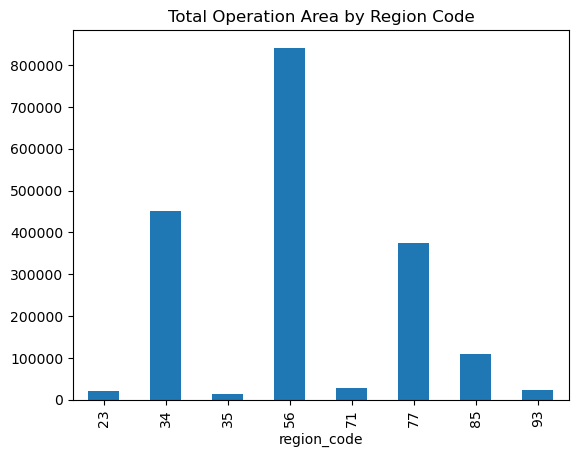

In [35]:
# Grouping the data by region code and calculating the sum of operation area
op_area_by_region = final_df.groupby('region_code')['op_area'].sum()

# Plotting the results
op_area_by_region.plot(kind='bar', title='Total Operation Area by Region Code')

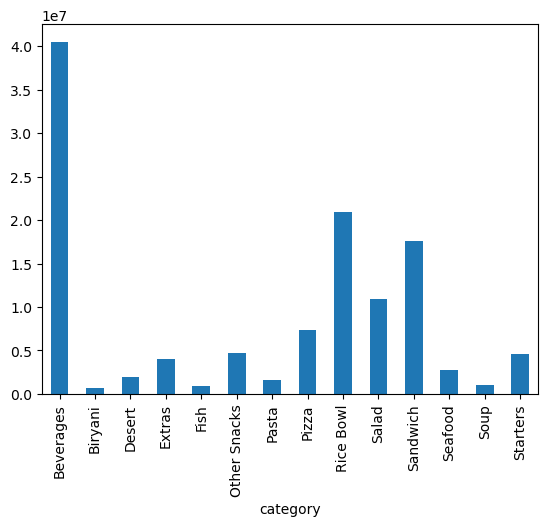

In [36]:
# Create a bar chart to compare the number of orders for each meal category
df_grouped = final_df.groupby(['category'])['num_orders'].sum()
df_grouped.plot(kind='bar')
plt.show()


#  Prediction